___
# Ciência dos Dados - PROJETO 1

## BRUNO  TRICATE MALTA

## Quanto a renda per capta influencia no acesso que os habitantes têm à alimentação saudável?

___
## Introdução

   Nesta projeto pretendo analisar como o IDH e a renda per capta influenciam o acesso que as pessoas tem a uma alimentação saudável. Para obter meus resultados irei comparar a resposta de algumas perguntas dos cinco estados com maior IDH do país, e assim tirar conclusões. 


___
## Análise e Resultados

In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [131]:
import os
meu_diretorio = "/Users/Bruno/Desktop/Insper/PROJETO/PROJETO-1---CI-NCIA-DOS-DADOS"

import pandas as pd
dados = pd.read_csv('DOM2013.csv')
dados_limpo = dados.loc[ : ,["UF","V4621","V4620","V0224","V2115","V2117","V2121"]]


dados_limpo = dados_limpo[pd.notnull(dados_limpo.UF) & pd.notnull(dados_limpo.V4621) & pd.notnull(dados_limpo.V4620) & pd.notnull(dados_limpo.V0224) & pd.notnull(dados_limpo.V2115) & pd.notnull(dados_limpo.V2117) & pd.notnull(dados_limpo.V2121)]

dados_limpo.UF = dados_limpo.UF.astype('category')
dados_limpo.UF = dados_limpo.UF.astype('category')
dados_limpo.V4621 = dados_limpo.V4621.astype('float')
dados_limpo.V4620 = dados_limpo.V4620.astype('float')
dados_limpo.V0224 = dados_limpo.V0224.astype('category')
dados_limpo.V2115 = dados_limpo.V2115.astype('category')
dados_limpo.V2117 = dados_limpo.V2117.astype('category')
dados_limpo.V2121 = dados_limpo.V2121.astype('category')

dados_limpo.V0224.cat.categories = (['Sim','Não'])
dados_limpo.V2115.cat.categories = (['Sim','Não'])
dados_limpo.V2117.cat.categories = (['Sim','Não'])
dados_limpo.V2121.cat.categories = (['Sim','Não'])
dados_limpo.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

dados_limpo = dados_limpo.loc[(dados_limpo.UF != 'Rondônia') & (dados_limpo.UF != 'Acre') & (dados_limpo.UF != 'Amazonas') & (dados_limpo.UF != 'Roraima') & (dados_limpo.UF != 'Pará')]
dados_limpo = dados_limpo.loc[(dados_limpo.UF != 'Amapá') & (dados_limpo.UF != 'Tocantins') & (dados_limpo.UF != 'Maranhão') & (dados_limpo.UF != 'Piauí') & (dados_limpo.UF != 'Ceará')]
dados_limpo = dados_limpo.loc[(dados_limpo.UF != 'Rio Grande do Norte') & (dados_limpo.UF != 'Paraíba') & (dados_limpo.UF != 'Pernambuco') & (dados_limpo.UF != 'Alagoas') & (dados_limpo.UF != 'Sergipe')]
dados_limpo = dados_limpo.loc[(dados_limpo.UF != 'Bahia') & (dados_limpo.UF != 'Minas Gerais') & (dados_limpo.UF != 'Espírito Santo') & (dados_limpo.UF != 'Rio Grande do Sul') & (dados_limpo.UF != 'Mato Grosso do Sul')]
dados_limpo = dados_limpo.loc[(dados_limpo.UF != 'Mato Grosso') & (dados_limpo.UF != 'Goiás')]
dados_limpo = dados_limpo.loc[dados_limpo.V4621 < 10**10] 
dados_limpo = dados_limpo.loc[dados_limpo.V4621 > 0] 

dados_RJ = dados_limpo[dados_limpo.UF == "Rio de Janeiro"] 
dados_SP = dados_limpo[dados_limpo.UF == "São Paulo"] 
dados_DF = dados_limpo[dados_limpo.UF == "Distrito Federal"] 
dados_SC = dados_limpo[dados_limpo.UF == "Santa Catarina"] 
dados_PR = dados_limpo[dados_limpo.UF == "Paraná"] 


In [132]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [133]:

ct4=pd.crosstab(dados_limpo.UF,dados_limpo.V2115,margins=True,rownames=['Educação'], colnames=['Default']).apply(percConvert, axis=1)
ct5 = pd.crosstab(dados_limpo.UF,dados_limpo.V2117,margins=True,rownames=['Educação'], colnames=['Default']).apply(percConvert, axis=1)
ct6 = pd.crosstab(dados_limpo.UF,dados_limpo.V2121,margins=True,rownames=['Educação'], colnames=['Default']).apply(percConvert, axis=1)

ess


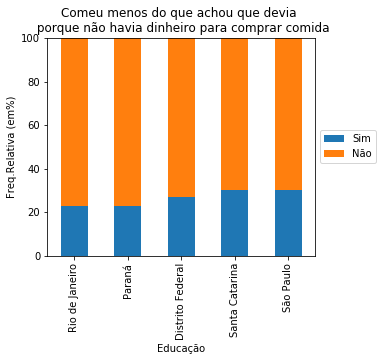

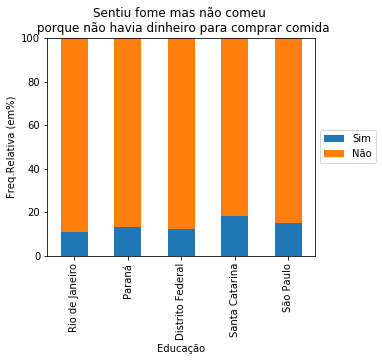

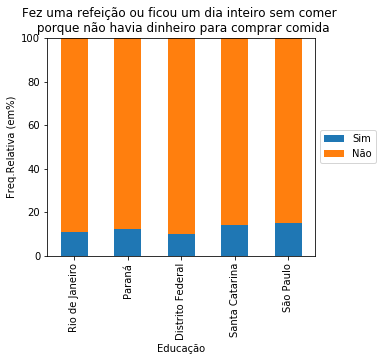

In [134]:
ct4 = ct4.iloc[[18,20,26,21,19],0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Comeu menos do que achou que devia \n porque não havia dinheiro para comprar comida')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct5 = ct5.iloc[[18,20,26,21,19],0:2]
plot = ct5.plot(kind='bar', stacked=True,title='Sentiu fome mas não comeu \n porque não havia dinheiro para comprar comida')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ct6 = ct6.iloc[[18,20,26,21,19],0:2]
plot = ct6.plot(kind='bar',stacked=True,title='Fez uma refeição ou ficou um dia inteiro sem comer \n porque não havia dinheiro para comprar comida')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))







In [135]:
print("A média da renda do Distrito Federal é:")
print(dados_DF.V4621.mean())

print("A média da renda do São Paulo é:")
print(dados_SP.V4621.mean())

print("A média da renda do Rio de Janeiro é:")
print(dados_RJ.V4621.mean())

print("A média da renda do Santa Catarina é:")
print(dados_SC.V4621.mean())

print("A média da renda do Paraná é:")
print(dados_PR.V4621.mean())

A média da renda do Distrito Federal é:
714.4333333333333
A média da renda do São Paulo é:
686.8541666666666
A média da renda do Rio de Janeiro é:
665.0643598615917
A média da renda do Santa Catarina é:
842.2305475504322
A média da renda do Paraná é:
661.1512513601741


___
## Conclusão 

Descreva aqui suas conclusões!

   Os gráficos e valores obtidos forneceram informações muito necessárias para a conclusão do projeto. De acordo com tais gráficos, o acesso à alimentação segue a ordem abaixo relacionada.
   O Distrito Federal aparece no topo da lista, uma vez que os resultados apontam que, em frequência relativa, os habitantes deste estado têm maior acesso aos alimentos.
   
1º - Distrito Federal 
2º - Rio de Janeiro
3º - Paraná
4º - Santa Catarina
5º - São Paulo

A ordem dos estados com maior média de renda per capta, curiosamente, não condiz com a ordem acima. Desta maneira é possível concluir que a renda não tem uma influência direta no acesso a alimentação. Da mesma forma, se utilizarmos um índice externo, como por exemplo o IDH, cujo cálculo leva em conta a renda, educação e saúde, a ordem dos estados com maior IDH no país também não condiz com a sequência obtida na análise dos gráficos.